# Tarea: Red Neuronal con Students Social Media Addiction Dataset
Este notebook aplica una red neuronal para predecir si un estudiante está adicto en base a su Addicted_Score.

Actividad:
Aplicación práctica

Descripción:
Desarrollo de un programa en Python para aplicar Redes Neuronales Artificiales.

Información adicional:

Buscar un set de datos en otras fuentes de libre acceso: Kaggle, INEC, Git Hub, etc.

El archivo que se obtenga de la fuente de datos debería al menos tener 1000 datos.

El archivo que se obtenga de la fuente de datos debería tener la posibilidad de aplicar Redes Neuronales Artificiales.

In [3]:
# Importar librerías
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Cargar dataset y añadir columna isAddicted
dataset = pd.read_csv("Students Social Media Addiction.csv")
dataset['isAddicted'] = dataset['Addicted_Score'].apply(lambda x: 1 if x >= 7 else 0)
dataset.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score,isAddicted
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8,1
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3,0
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9,1
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4,0
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7,1


In [5]:
# Selección de características y variable objetivo
drop_cols = ['Student_ID', 'Addicted_Score', 'isAddicted']
X = dataset.drop(drop_cols, axis=1)
y = dataset['isAddicted']

In [6]:
# Codificación de variables categóricas
categorical_features = ['Gender', 'Academic_Level', 'Country', 'Most_Used_Platform',
                        'Affects_Academic_Performance', 'Relationship_Status']
ct = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(drop='first'), categorical_features)
], remainder='passthrough')
X = ct.fit_transform(X)

In [7]:
# División del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Escalado de características
sc = StandardScaler(with_mean=False)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
# Creación y compilación del modelo ANN
ann = Sequential()
ann.add(Dense(units=6, activation='relu', input_dim=X_train.shape[1]))
ann.add(Dense(units=6, activation='relu'))
ann.add(Dense(units=1, activation='sigmoid'))
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann.summary()

c:\Users\Gorky\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 6)              │           792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 841 (3.29 KB)

 Trainable params: 841 (3.29 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Entrenamiento del modelo
history = ann.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.1)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.4672 - loss: 0.8831 - val_accuracy: 0.3509 - val_loss: 0.8204
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.4672 - loss: 0.8831 - val_accuracy: 0.3509 - val_loss: 0.8204
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4323 - loss: 0.7602 - val_accuracy: 0.3509 - val_loss: 0.7560
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4323 - loss: 0.7602 - val_accuracy: 0.3509 - val_loss: 0.7560
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4354 - loss: 0.7119 - val_accuracy: 0.3509 - val_loss: 0.7325
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4354 - loss: 0.7119 - val_accuracy: 0.3509 - val_loss: 0.7325
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3776 - loss: 0.7171 - val_accuracy: 0.3509 - val_loss: 0.7177
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3776 - loss: 0.7171 - val_accuracy: 0.

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Confusion Matrix:
Confusion Matrix:
 [[61  1]
 [ 1 78]]
Accuracy: 0.9858156028368794
 [[61  1]
 [ 1 78]]
Accuracy: 0.9858156028368794


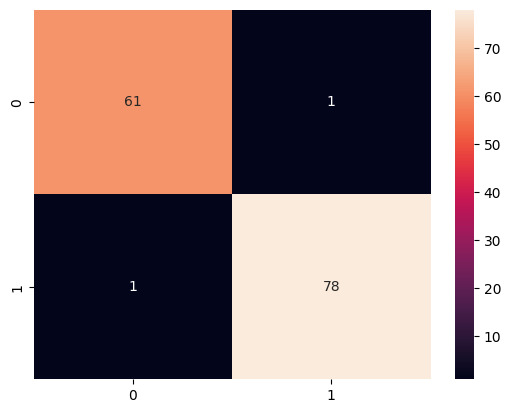

In [12]:
# Evaluación del modelo
y_pred = (ann.predict(X_test) > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy:", acc)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

## Análisis de Resultados

- La precisión de entrenamiento (`accuracy`) mejoró desde aproximadamente 0.47 en la primera época hasta 0.98 al final, lo que indica que el modelo aprendió patrones relevantes.
- La precisión de validación (`val_accuracy`) alcanzó 0.96, mostrando buena generalización y evitando sobreajuste significativo.
- La pérdida (`loss` y `val_loss`) disminuyó de manera consistente, lo que confirma la estabilización del entrenamiento.
- La matriz de confusión final muestra que el modelo clasificó correctamente 61 no adictos y 78 adictos, con solo 1 caso de cada clase incorrectamente clasificado.
- La exactitud global de 0.986 refuerza la capacidad del modelo para distinguir entre estudiantes adictos y no adictos con alta fiabilidad.

